   age     sex   bmi smoker     region  charges
0   25  female  29.3     no  southwest     3000
1   42    male  31.1    yes  northwest    15000
2   31  female  22.5     no  southwest     5000
3   55    male  34.2     no  northwest     8000
4   28  female  25.0     no  northwest     4000
5   45    male  38.5    yes  southwest    25000
6   50    male  29.9     no  southwest     7000
7   60  female  33.6     no  northwest     9500
8   46  female  29.1    yes  northwest    11000
9   48    male  31.0    yes  southwest    18000
   age   bmi  charges
0   25  29.3     3000
1   42  31.1    15000
2   31  22.5     5000
3   55  34.2     8000
4   28  25.0     4000
5   45  38.5    25000
6   50  29.9     7000
7   60  33.6     9500
8   46  29.1    11000
9   48  31.0    18000
0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool
   age   bmi  charges
0   25  29.3     3000
1   42  31.1    15000
2   31  22.5     5000
3   55  34.2     800

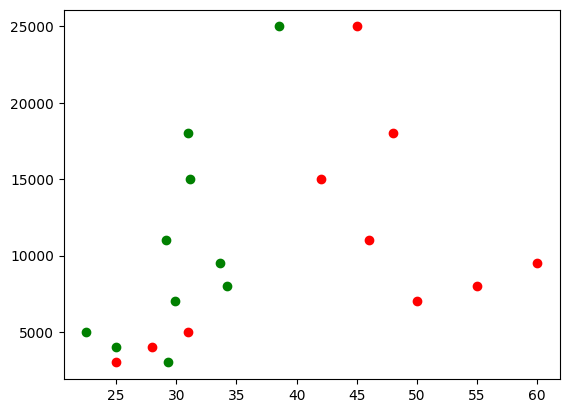

Epoch 1/10
25/25 [==============================] - 1s 12ms/step - loss: 0.6809 - accuracy: 0.5700 - val_loss: 0.5768 - val_accuracy: 0.7450
Epoch 2/10
25/25 [==============================] - 0s 5ms/step - loss: 0.5147 - accuracy: 0.8112 - val_loss: 0.4819 - val_accuracy: 0.8150
Epoch 3/10
25/25 [==============================] - 0s 5ms/step - loss: 0.4252 - accuracy: 0.8575 - val_loss: 0.4247 - val_accuracy: 0.8450
Epoch 4/10
25/25 [==============================] - 0s 5ms/step - loss: 0.3765 - accuracy: 0.8712 - val_loss: 0.3936 - val_accuracy: 0.8550
Epoch 5/10
25/25 [==============================] - 0s 5ms/step - loss: 0.3440 - accuracy: 0.8763 - val_loss: 0.3771 - val_accuracy: 0.8650
Epoch 6/10
25/25 [==============================] - 0s 5ms/step - loss: 0.3244 - accuracy: 0.8813 - val_loss: 0.3658 - val_accuracy: 0.8700
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3093 - accuracy: 0.8863 - val_loss: 0.3574 - val_accuracy: 0.8700
Epoch 8/10
25/25 [=

In [6]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
data = pd.read_excel(r'insurance.xlsx')
df1 = pd.DataFrame(data)
print(df1)
df2 = df1.drop(["sex","smoker","region"],axis = 1)
df2.isnull()
df3 = df2.dropna()
print(df3)
print(df3.duplicated())
df3 = df3.drop_duplicates()
print(df3)
df4=df3.duplicated(subset=['age'])
df4 = df3.drop_duplicates(subset=['age'],keep='last')
print(df4)
df4.reset_index(inplace=True,drop=True)
print(df4)
plt.scatter(df4['age'],df4['charges'],color='red')
plt.scatter(df4['bmi'],df4['charges'],color='g')
plt.show()
regr = linear_model.LinearRegression()
x=df4[['age','bmi']]
y = np.asanyarray(df4['charges'])
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = keras.Sequential([
    keras.layers.Input(shape=(20,)), 
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(1, activation='sigmoid') 
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
predictions = model.predict(X_test)